In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import he_normal
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 
#from pactools.grid_search import GridSearchCVProgressBar

Using TensorFlow backend.


In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(linestyle='-')
    fig.canvas.draw()

# Load the data

In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 120
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('The shape of train data is', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
The shape of train data is (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3 Convolutional layers

## With a ConvNet of (3, 3)

In [9]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 242us/step - loss: 0.5397 - acc: 0.8314 - val_loss: 0.0750 - val_acc: 0.9771
Epoch 2/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.1429 - acc: 0.9583 - val_loss: 0.0418 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0988 - acc: 0.9706 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 13s 219us/step - loss: 0.0828 - acc: 0.9755 - val_loss: 0.0260 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.0669 - acc: 0.9801 - val_loss: 0.0240 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 13s 219us/step - loss: 0.0606 - acc: 0.9816 - val_loss: 0.0219 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.0551 - acc: 0.9836 - val_loss: 0.

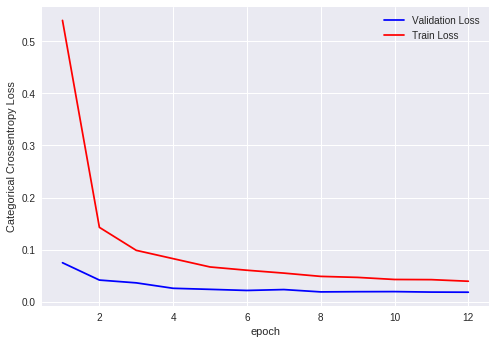

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** This plot seems to perform good, no signs of overfit.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


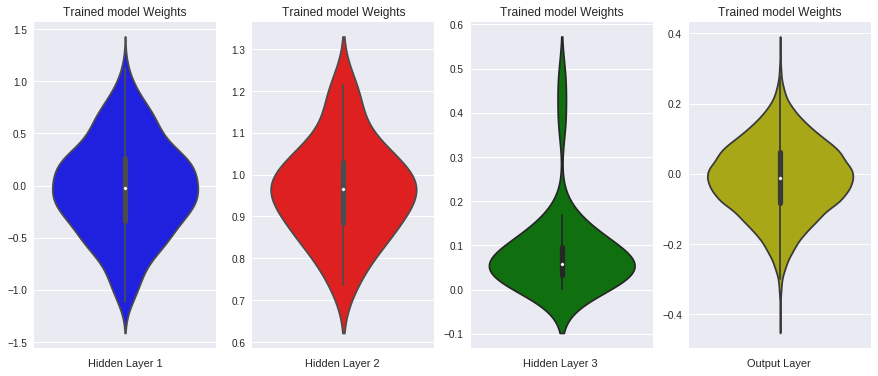

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With a ConvNet of (5, 5)

In [16]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.7307 - acc: 0.7730 - val_loss: 0.1247 - val_acc: 0.9639
Epoch 2/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.2601 - acc: 0.9286 - val_loss: 0.0873 - val_acc: 0.9740
Epoch 3/12
60000/60000 [==============================] - 20s 334us/step - loss: 0.1880 - acc: 0.9497 - val_loss: 0.0725 - val_acc: 0.9786
Epoch 4/12
60000/60000 [==============================] - 24s 400us/step - loss: 0.1619 - acc: 0.9564 - val_loss: 0.0633 - val_acc: 0.9817
Epoch 5/12
60000/60000 [==============================] - 26s 437us/step - loss: 0.1402 - acc: 0.9624 - val_loss: 0.0634 - val_acc: 0.9809
Epoch 6/12
60000/60000 [==============================] - 25s 411us/step - loss: 0.1356 - acc: 0.9633 - val_loss: 0.0620 - val_acc: 0.9822
Epoch 7/12
60000/60000 [==============================] - 25s 418us/step - loss: 0.1242 - acc: 0.9659 - val_loss: 0.

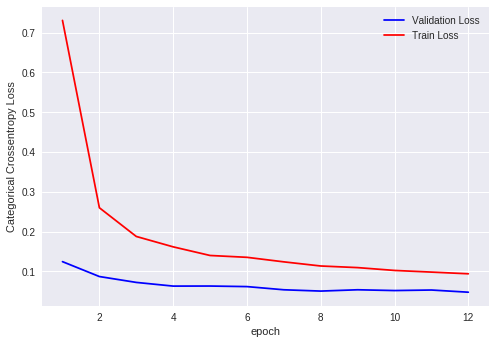

In [17]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


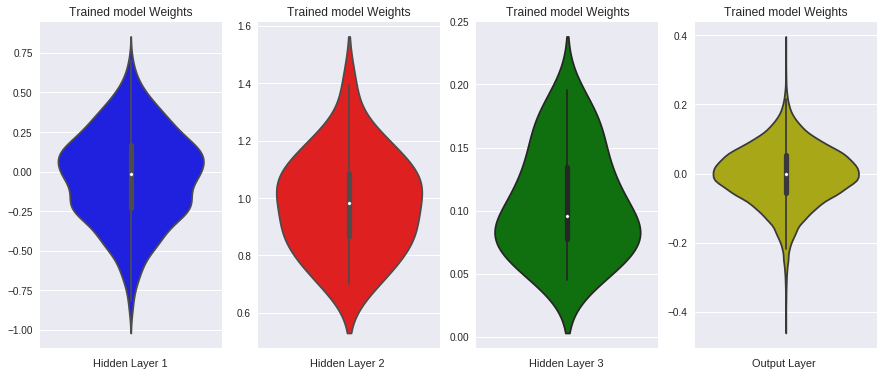

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Batch Normalization

In [24]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (7, 7), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.3341 - acc: 0.8942 - val_loss: 0.0706 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.1094 - acc: 0.9679 - val_loss: 0.0443 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0826 - acc: 0.9762 - val_loss: 0.0404 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0686 - acc: 0.9805 - val_loss: 0.0423 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 16s 275us/step - loss: 0.0584 - acc: 0.9835 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 21s 352us/step - loss: 0.0536 - acc: 0.9845 - val_loss: 0.0314 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 21s 348us/step - loss: 0.0463 - acc: 0.9865 - val_loss: 0.037

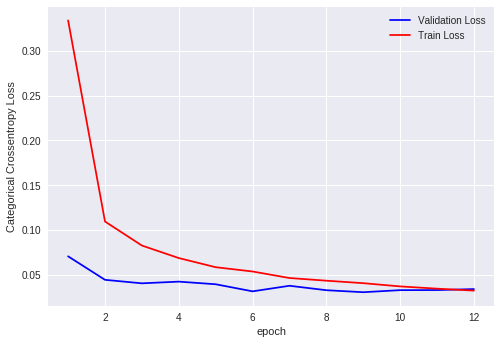

In [25]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


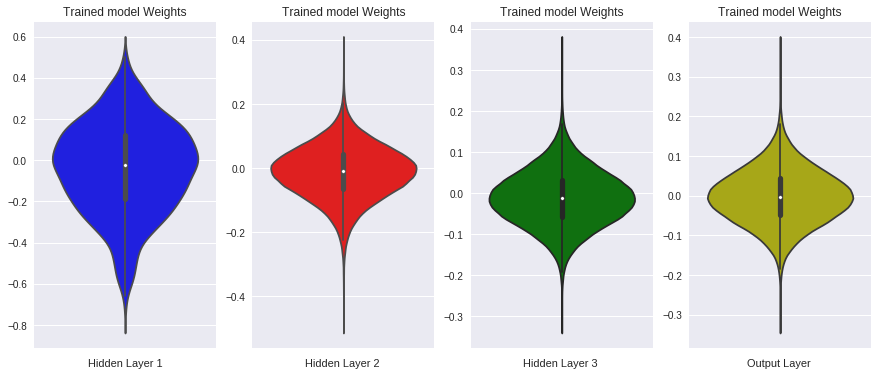

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Dropouts

In [4]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 236us/step - loss: 0.1097 - acc: 0.9662 - val_loss: 0.0484 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0359 - acc: 0.9889 - val_loss: 0.0395 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0213 - acc: 0.9932 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.0155 - acc: 0.9952 - val_loss: 0.0339 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 27s 449us/step - loss: 0.0115 - acc: 0.9966 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 27s 450us/step - loss: 0.0118 - acc: 0.9963 - val_loss: 0.0412 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 29s 477us/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.

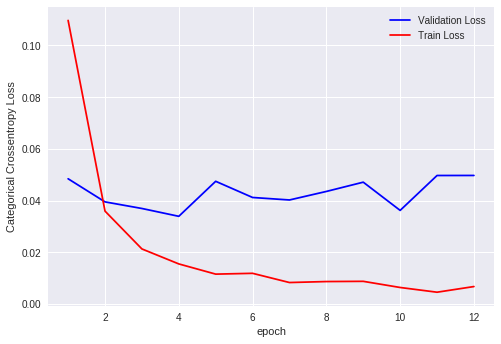

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


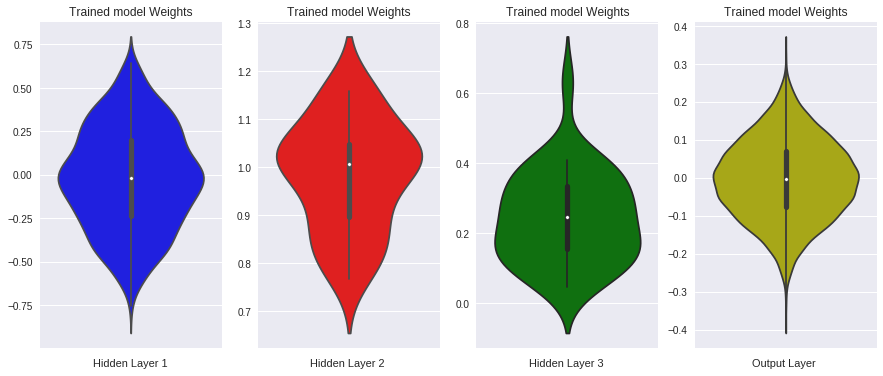

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 Convolutional layers

## With a ConvNet of (3, 3)

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 27s 450us/step - loss: 0.3628 - acc: 0.8891 - val_loss: 0.0677 - val_acc: 0.9780
Epoch 2/12
60000/60000 [==============================] - 30s 503us/step - loss: 0.1075 - acc: 0.9685 - val_loss: 0.0382 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 31s 510us/step - loss: 0.0779 - acc: 0.9777 - val_loss: 0.0277 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 31s 510us/step - loss: 0.0644 - acc: 0.9811 - val_loss: 0.0344 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 30s 508us/step - loss: 0.0576 - acc: 0.9828 - val_loss: 0.0269 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 30s 507us/step - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0209 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 30s 506us/step - loss: 0.0465 - acc: 0.9857 - val_loss: 0.

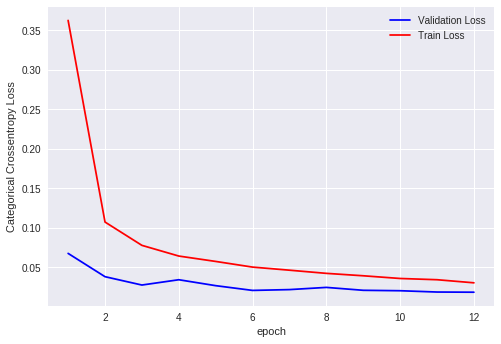

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


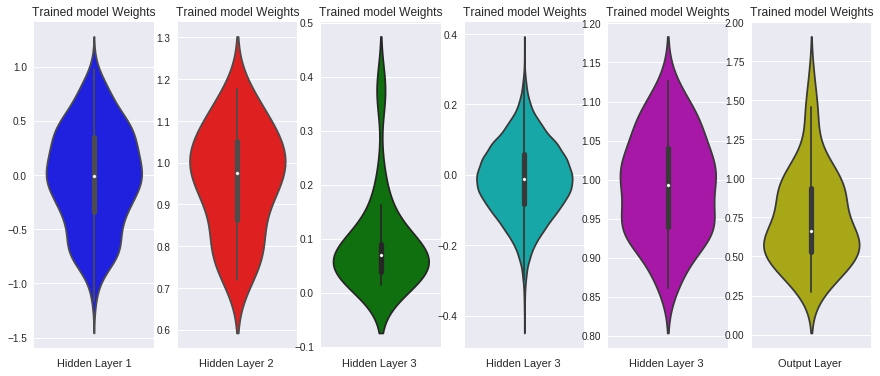

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With a ConvNet of (5,5)

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 289us/step - loss: 0.9827 - acc: 0.6914 - val_loss: 0.1583 - val_acc: 0.9569
Epoch 2/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.3364 - acc: 0.9140 - val_loss: 0.1086 - val_acc: 0.9701
Epoch 3/12
60000/60000 [==============================] - 21s 357us/step - loss: 0.2551 - acc: 0.9369 - val_loss: 0.0903 - val_acc: 0.9753
Epoch 4/12
60000/60000 [==============================] - 22s 360us/step - loss: 0.2160 - acc: 0.9474 - val_loss: 0.0709 - val_acc: 0.9816
Epoch 5/12
60000/60000 [==============================] - 22s 370us/step - loss: 0.1885 - acc: 0.9546 - val_loss: 0.0720 - val_acc: 0.9805
Epoch 6/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.1751 - acc: 0.9581 - val_loss: 0.0670 - val_acc: 0.9815
Epoch 7/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.1606 - acc: 0.9616 - val_loss: 0.

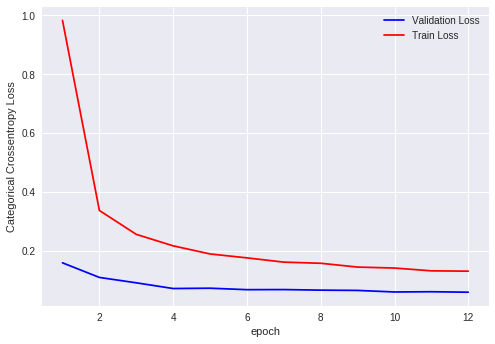

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


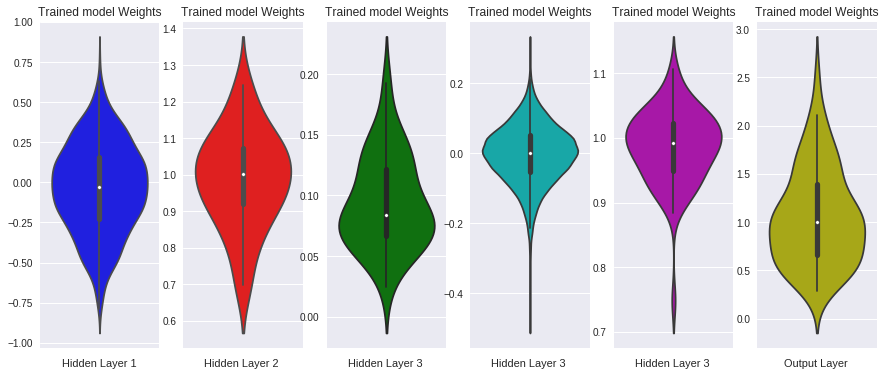

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Batch Normalization

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (7, 7), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 478us/step - loss: 0.5290 - acc: 0.8407 - val_loss: 0.0795 - val_acc: 0.9760
Epoch 2/12
60000/60000 [==============================] - 33s 556us/step - loss: 0.1244 - acc: 0.9670 - val_loss: 0.0478 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 32s 541us/step - loss: 0.0929 - acc: 0.9751 - val_loss: 0.0429 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 34s 560us/step - loss: 0.0744 - acc: 0.9798 - val_loss: 0.0386 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 34s 559us/step - loss: 0.0643 - acc: 0.9825 - val_loss: 0.0453 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 31s 518us/step - loss: 0.0590 - acc: 0.9840 - val_loss: 0.0391 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 24s 399us/step - loss: 0.0515 - acc: 0.9855 - val_loss: 0.

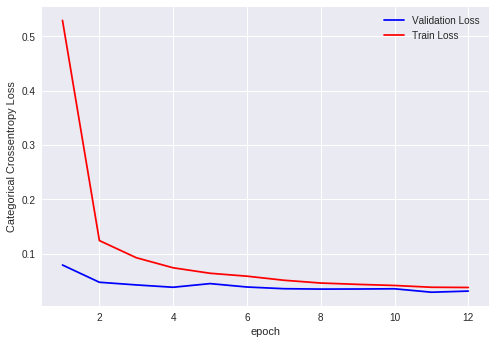

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


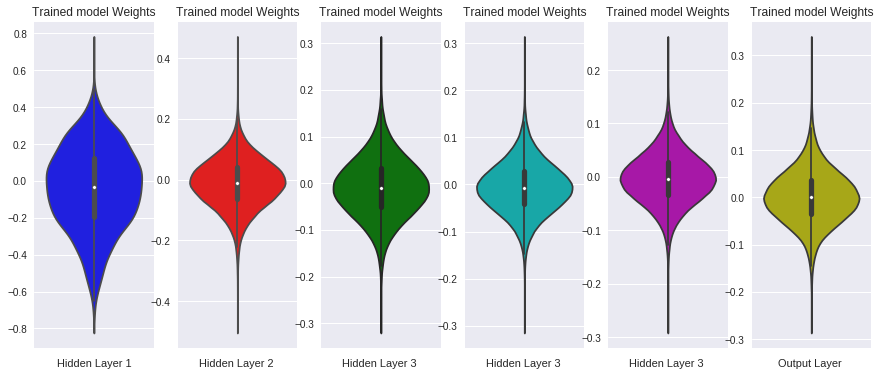

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Dropouts

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 500us/step - loss: 0.1106 - acc: 0.9657 - val_loss: 0.0462 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 34s 563us/step - loss: 0.0389 - acc: 0.9879 - val_loss: 0.0402 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 36s 603us/step - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0485 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 37s 618us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0531 - val_acc: 0.9848
Epoch 5/12
60000/60000 [==============================] - 36s 599us/step - loss: 0.0143 - acc: 0.9951 - val_loss: 0.0448 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 37s 613us/step - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0546 - val_acc: 0.9853
Epoch 7/12
60000/60000 [==============================] - 37s 620us/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.

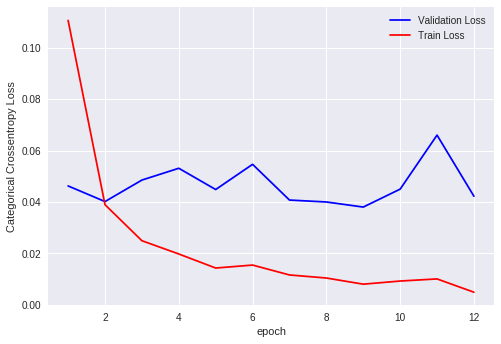

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


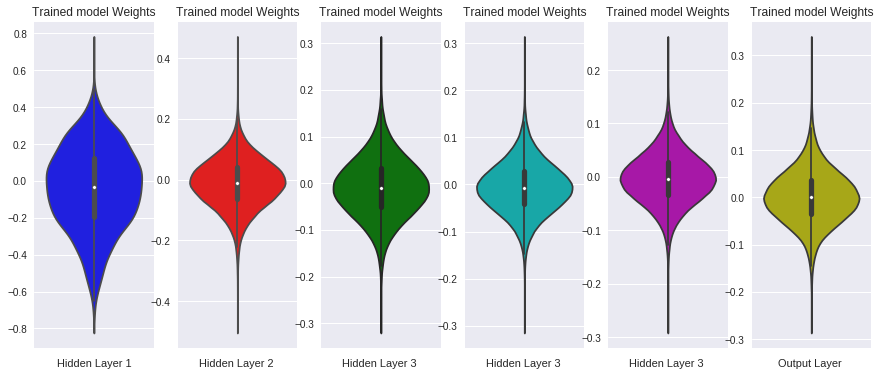

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 7 Convolutional layers

## With a ConvNet of (3, 3)

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 32s 536us/step - loss: 0.5414 - acc: 0.8298 - val_loss: 0.0835 - val_acc: 0.9742
Epoch 2/12
60000/60000 [==============================] - 19s 316us/step - loss: 0.1346 - acc: 0.9607 - val_loss: 0.0568 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0956 - acc: 0.9723 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0763 - acc: 0.9775 - val_loss: 0.0333 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.0660 - acc: 0.9809 - val_loss: 0.0282 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0581 - acc: 0.9834 - val_loss: 0.0254 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 18s 299us/step - loss: 0.0526 - acc: 0.9849 - val_loss: 0.

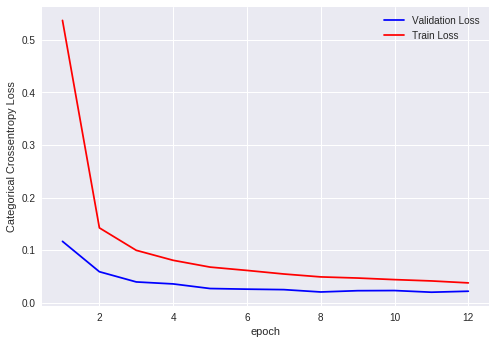

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


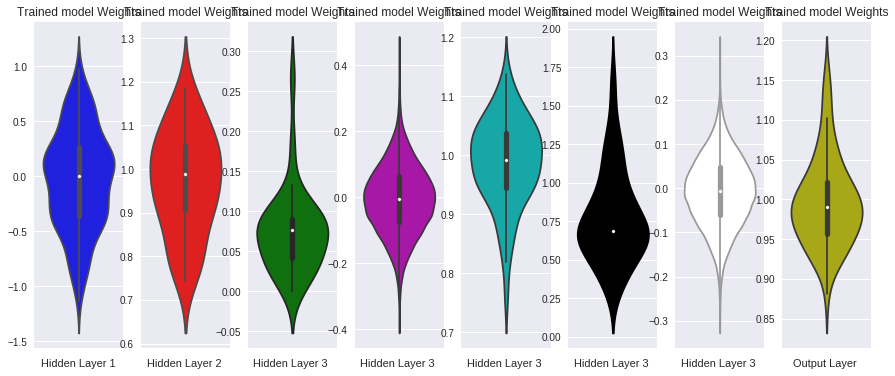

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h6_w = w_after[10].flatten().reshape(-1,1)
h7_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='w')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With a ConvNet of (5, 5)

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 631us/step - loss: 1.4358 - acc: 0.5296 - val_loss: 0.2543 - val_acc: 0.9360
Epoch 2/12
60000/60000 [==============================] - 27s 449us/step - loss: 0.4906 - acc: 0.8752 - val_loss: 0.1370 - val_acc: 0.9663
Epoch 3/12
60000/60000 [==============================] - 27s 458us/step - loss: 0.3386 - acc: 0.9218 - val_loss: 0.1070 - val_acc: 0.9743
Epoch 4/12
60000/60000 [==============================] - 27s 454us/step - loss: 0.2876 - acc: 0.9369 - val_loss: 0.0997 - val_acc: 0.9763
Epoch 5/12
60000/60000 [==============================] - 27s 447us/step - loss: 0.2575 - acc: 0.9442 - val_loss: 0.0960 - val_acc: 0.9788
Epoch 6/12
60000/60000 [==============================] - 28s 463us/step - loss: 0.2293 - acc: 0.9494 - val_loss: 0.0866 - val_acc: 0.9805
Epoch 7/12
60000/60000 [==============================] - 27s 457us/step - loss: 0.2199 - acc: 0.9524 - val_loss: 0.

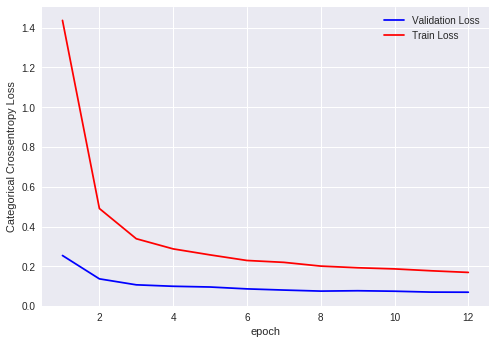

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


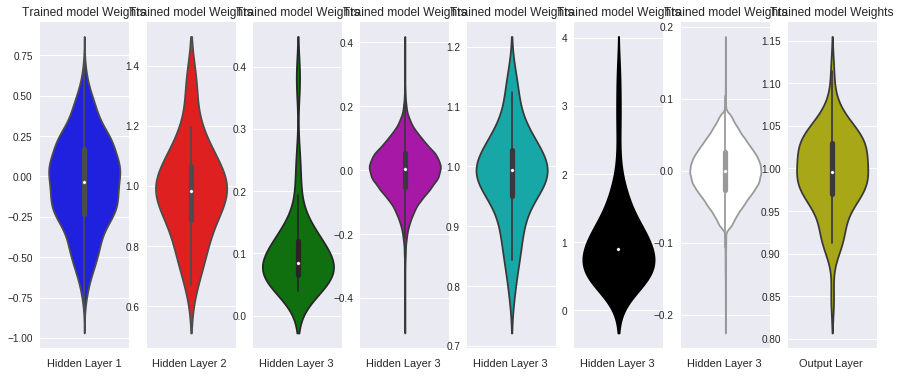

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h6_w = w_after[10].flatten().reshape(-1,1)
h7_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='w')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Batch Normalization

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (7, 7), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 840us/step - loss: 0.9997 - acc: 0.6705 - val_loss: 0.1929 - val_acc: 0.9627
Epoch 2/12
60000/60000 [==============================] - 38s 633us/step - loss: 0.1647 - acc: 0.9598 - val_loss: 0.0585 - val_acc: 0.9838
Epoch 3/12
60000/60000 [==============================] - 38s 636us/step - loss: 0.1126 - acc: 0.9735 - val_loss: 0.0491 - val_acc: 0.9853
Epoch 4/12
60000/60000 [==============================] - 38s 632us/step - loss: 0.0904 - acc: 0.9776 - val_loss: 0.0482 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 29s 490us/step - loss: 0.0782 - acc: 0.9805 - val_loss: 0.0496 - val_acc: 0.9876
Epoch 6/12
60000/60000 [==============================] - 28s 463us/step - loss: 0.0690 - acc: 0.9833 - val_loss: 0.0436 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 28s 460us/step - loss: 0.0669 - acc: 0.9838 - val_loss: 0.

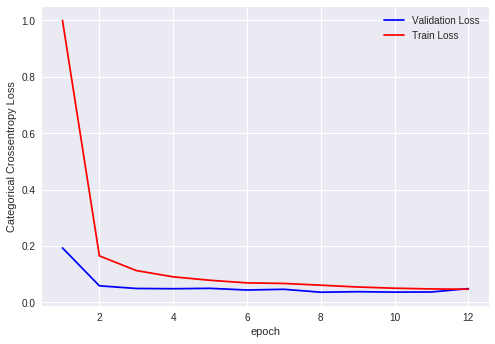

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


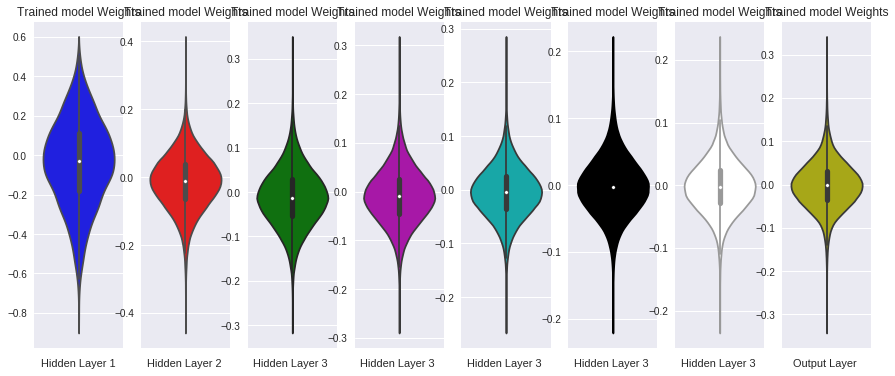

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h6_w = w_after[10].flatten().reshape(-1,1)
h7_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='w')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Dropouts

In [0]:
# convert class vectors to binary class matrices
from keras.initializers import he_normal
from keras.optimizers import Adam
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides= 2, padding= 'valid', kernel_initializer = he_normal(), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Conv2D(64, (7, 7), activation='relu', padding= 'same', kernel_initializer = he_normal()))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = he_normal()))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 55s 920us/step - loss: 0.1341 - acc: 0.9585 - val_loss: 0.0787 - val_acc: 0.9772
Epoch 2/12
60000/60000 [==============================] - 48s 792us/step - loss: 0.0540 - acc: 0.9834 - val_loss: 0.0588 - val_acc: 0.9818
Epoch 3/12
60000/60000 [==============================] - 47s 782us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0483 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 47s 778us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0435 - val_acc: 0.9876
Epoch 5/12
60000/60000 [==============================] - 44s 726us/step - loss: 0.0240 - acc: 0.9924 - val_loss: 0.0523 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 32s 532us/step - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0640 - val_acc: 0.9833
Epoch 7/12
60000/60000 [==============================] - 32s 536us/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.

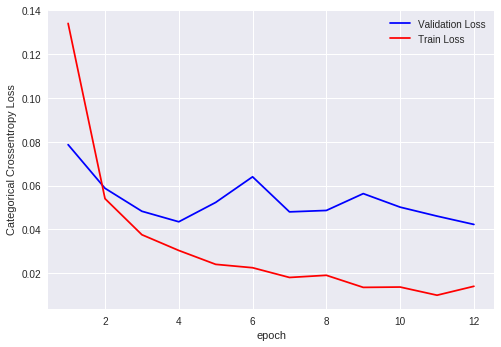

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


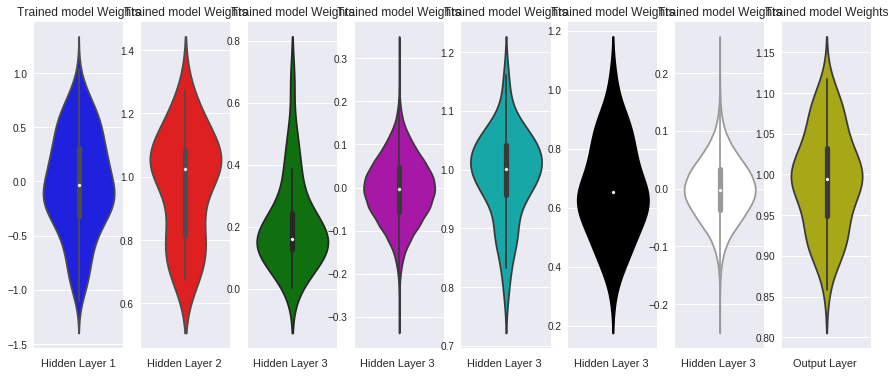

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h6_w = w_after[10].flatten().reshape(-1,1)
h7_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='w')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusions

1) Models **with Batch normalization and dropouts** or just seems to **perform better than others**.

2) Models **without dropouts** seem to **perform terribly** as they become **overfit**.

3) Models **without batch normalization** seems to **perform okay** but **chances of overfitting** as number of epochs increase.

4) Models with **only Batch normalization** takes a **lot of time** to compute compared to models with **only Dropouts**.

5) Model seems to **perform best** when number of **convolutional layers is 7  with (3, 3)** and an **accuracy of 99.53%**.

In [7]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Number of Convolutional layers","Optimizations", "Accuracy", "Train error", "Test error", "Performance"]
x.add_row([3, "With ConvNet (3, 3)", "99.46%", "0.0396", "0.0185", "Good performance"])
x.add_row(["", "With ConvNet (5, 5)", "98.74%", "0.0942", "0.0479", "Good performance"])
x.add_row(["", "Without Dropouts", "98.76%", "0.0067", "0.0497", "Severely overfit"])
x.add_row(["", "Without BN", "99.02%", "0.0323", "0.0340","Chances of overfit as epochs increase"])
x.add_row(["", "", "", "", "", ""])
x.add_row([5, "With ConvNet (3, 3)", "99.47%", "0.0305", "0.0186", "Good performance"])
x.add_row(["", "With ConvNet (5, 5)", "98.53%", "0.1300", "0.0584", "Good performance"])
x.add_row(["", "Without Dropouts", "98.94%", "0.0049", "0.0422", "Severely overfit"])
x.add_row(["", "Without BN", "99.14%", "0.0382", "0.0315","Chances of overfit as epochs increase"])
x.add_row(["", "", "", "", "", ""])
x.add_row([7, "With ConvNet (3, 3)", "99.53%", "0.0382", "0.0193", "Good performance"])
x.add_row(["", "With ConvNet (5, 5)", "98.38%", "0.1694", "0.0699", "Good performance"])
x.add_row(["", "Without Dropouts", "98.80%", "0.0140", "0.0422", "Severely overfit"])
x.add_row(["", "Without BN", "98.88%", "0.0465", "0.0486","Chances of overfit as epochs increase"])
print(x.get_string())

+--------------------------------+---------------------+----------+-------------+------------+---------------------------------------+
| Number of Convolutional layers |    Optimizations    | Accuracy | Train error | Test error |              Performance              |
+--------------------------------+---------------------+----------+-------------+------------+---------------------------------------+
|               3                | With ConvNet (3, 3) |  99.46%  |    0.0396   |   0.0185   |            Good performance           |
|                                | With ConvNet (5, 5) |  98.74%  |    0.0942   |   0.0479   |            Good performance           |
|                                |   Without Dropouts  |  98.76%  |    0.0067   |   0.0497   |            Severely overfit           |
|                                |      Without BN     |  99.02%  |    0.0323   |   0.0340   | Chances of overfit as epochs increase |
|                                |                     